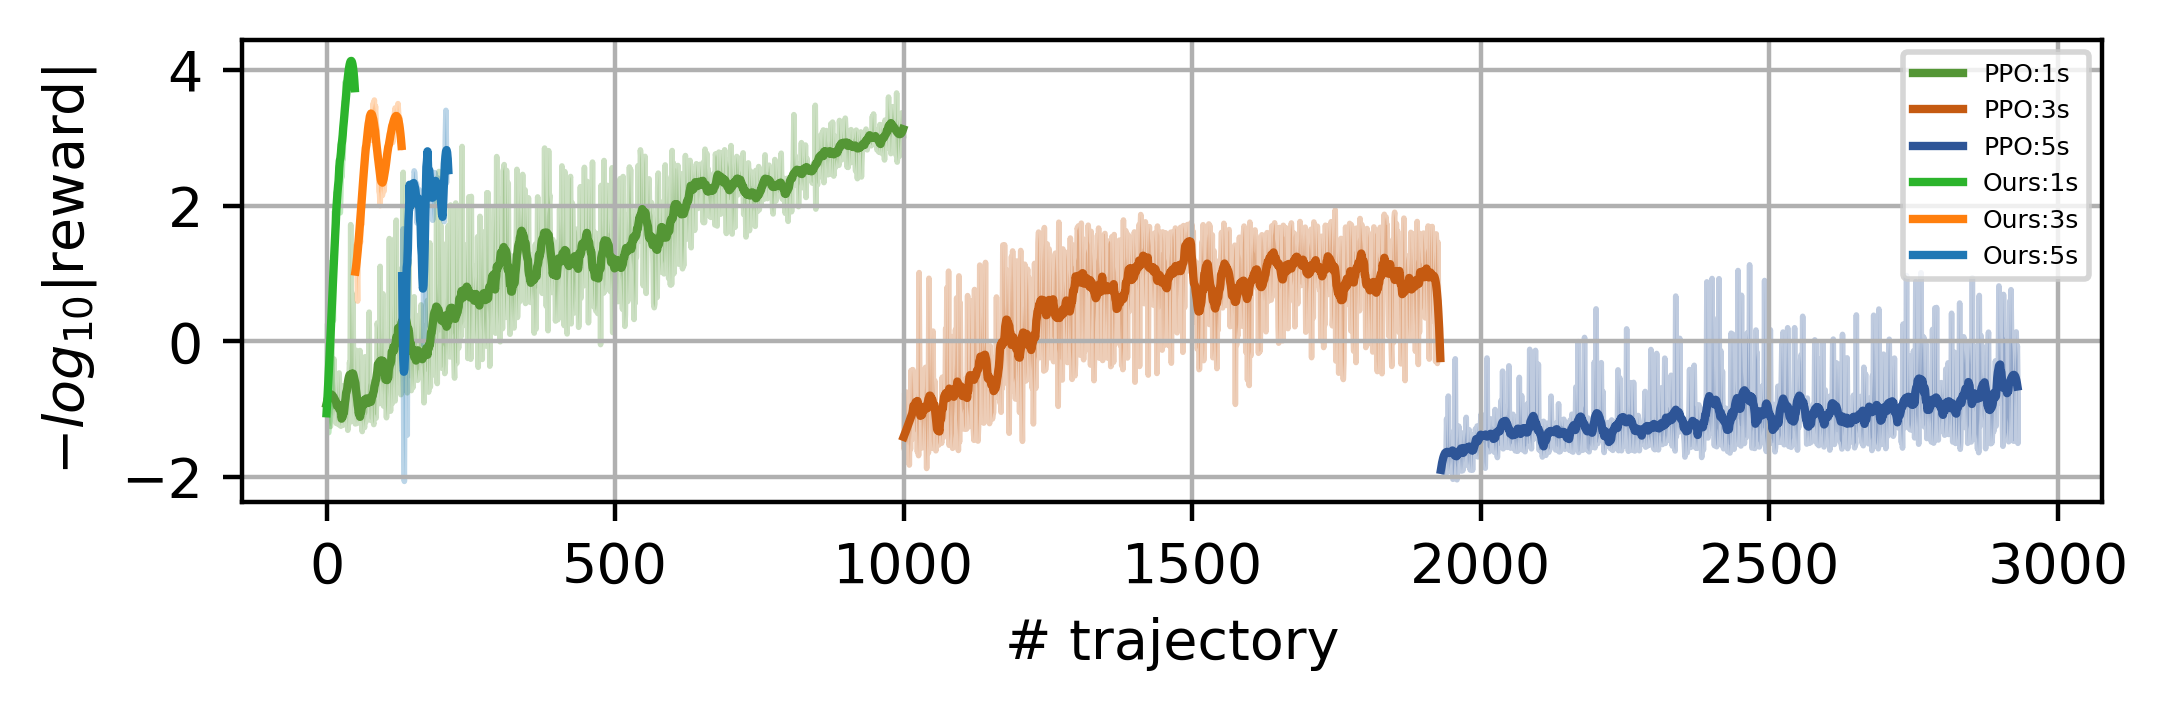

In [34]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy.signal import savgol_filter

diff1s = pd.read_csv("/Users/lizhehao/Desktop/research/SPlisHSPlasH-fix-macos/pySPlisHSPlasH/research/selectedRuns/diff-1s.csv")
diff3s = pd.read_csv("/Users/lizhehao/Desktop/research/SPlisHSPlasH-fix-macos/pySPlisHSPlasH/research/selectedRuns/diff-3s.csv")
diff5s = pd.read_csv("/Users/lizhehao/Desktop/research/SPlisHSPlasH-fix-macos/pySPlisHSPlasH/research/selectedRuns/diff-5s.csv")
diff5s = diff5s[:81]

ppo1s = pd.read_csv("/Users/lizhehao/Desktop/research/SPlisHSPlasH-fix-macos/pySPlisHSPlasH/research/selectedRuns/ppo-1s.csv")
# ppo1s = ppo1s[:400]
ppo3s = pd.read_csv("/Users/lizhehao/Desktop/research/SPlisHSPlasH-fix-macos/pySPlisHSPlasH/research/selectedRuns/ppo-3s.csv")
# ppo3s = ppo3s[:400]
ppo5s = pd.read_csv("/Users/lizhehao/Desktop/research/SPlisHSPlasH-fix-macos/pySPlisHSPlasH/research/selectedRuns/ppo-5s.csv")

window_size = 31
order = 3
# test["smoothed"] = savgol_filter(test["Value"], 7, order)
# train["smoothed"] = savgol_filter(train["Value"], window_size, order)
# train = train[:601]

# plt.yticks(np.arange(-3, 2, 0.5))
# diff_x = len(diff1s['step']) + len(diff3s['step']) + len(diff5s['step'])
get_x = lambda a: np.array(list(range(len(a['Step']))))
l = lambda a: len(a["Step"])

blue = (31 / 255, 119 / 255, 180 / 255, 1)
blue_ppo = (46 / 255, 85 / 255, 151 / 255, 1)

orange = (255 / 255, 127 / 255, 14 / 255, 1)
orange_ppo = (197 / 255, 90 / 255, 17 / 255, 1)

green = (44/255, 180/255, 44/255, 1)
green_ppo = (84/255, 150/255, 53/255, 1)

red = (214 / 255, 39 / 255, 40 / 255)

purple = (148 / 255, 103 / 255, 189/ 255)

brown = (140 / 255, 86 / 255, 75 / 255)

def draw(diff1s, offset=0, minus=True, label="Ours", use_smooth=True, window_size =31, order=3, color=green):
    a = -1 if minus else 1
    if use_smooth:
        try:
            y =  - np.log10((-a) * np.array(diff1s['Value']))
        except Exception:
            print(np.array(diff1s['Value']))
        y_smooth = savgol_filter(y, window_size, order)
        # plt.plot(y)
        plt.plot(offset + get_x(diff1s), y_smooth, label=f"{label}", color=color)
        plt.fill_between(offset + get_x(diff1s), np.minimum(y, y_smooth), np.maximum(y, y_smooth), color=color, alpha=0.3)
    else:
        plt.plot(get_x(diff1s) + offset, - np.log10((-a) * np.array(diff1s['Value'])) , label=f"{label}", color=color)

plt.figure(figsize=(6,1.5), dpi=400)
plt.grid(True)
draw(ppo1s, minus=False, label="PPO:1s", color=green_ppo)
draw(ppo3s, offset=l(ppo1s),  minus=False,label= "PPO:3s", color=orange_ppo)
draw(ppo5s, offset=l(ppo1s)+l(ppo3s), minus=False,label= "PPO:5s", color=blue_ppo)

draw(diff1s,  use_smooth=True, color=green, label="Ours:1s")
draw(diff3s, offset= l(diff1s), use_smooth=True, color=orange, label="Ours:3s")
draw(diff5s, offset=l(diff1s) + l(diff3s), use_smooth=True, window_size=11, color=blue, label="Ours:5s")

# plt.figure(figsize=(6,2), dpi=400)
# plt.grid(True)
# draw(ppo3s,  False, "PPO", colors=[blue, light_blue])
# draw(diff3s,  use_smooth=False)

# plt.figure(figsize=(6,2), dpi=400)
# plt.grid(True)
# draw(ppo5s,  False, "PPO", colors=[blue, light_blue])
# draw(diff5s,  use_smooth=False)
# plt.plot(len(diff1s['Step']) + np.arange(len(diff1s['Step']))), -(np.array(diff3s['Value']))
# plt.plot(list(range(len(diff1s['Step']))), -(np.array(diff1s['Value'])))

# sns.lineplot(data=train, x="Step", y="smoothed", label="Training")
# sns.lineplot(data=test, x="Step", y="smoothed", label="Test")

# plt.legend(fontsize = 8)
plt.ylabel("$-log_{10}$$\|$reward$\|$")
plt.xlabel("# trajectory")
plt.legend(fontsize=4.5)
# plt.legend(loc='center right',bbox_to_anchor=(0.33, 0.9))

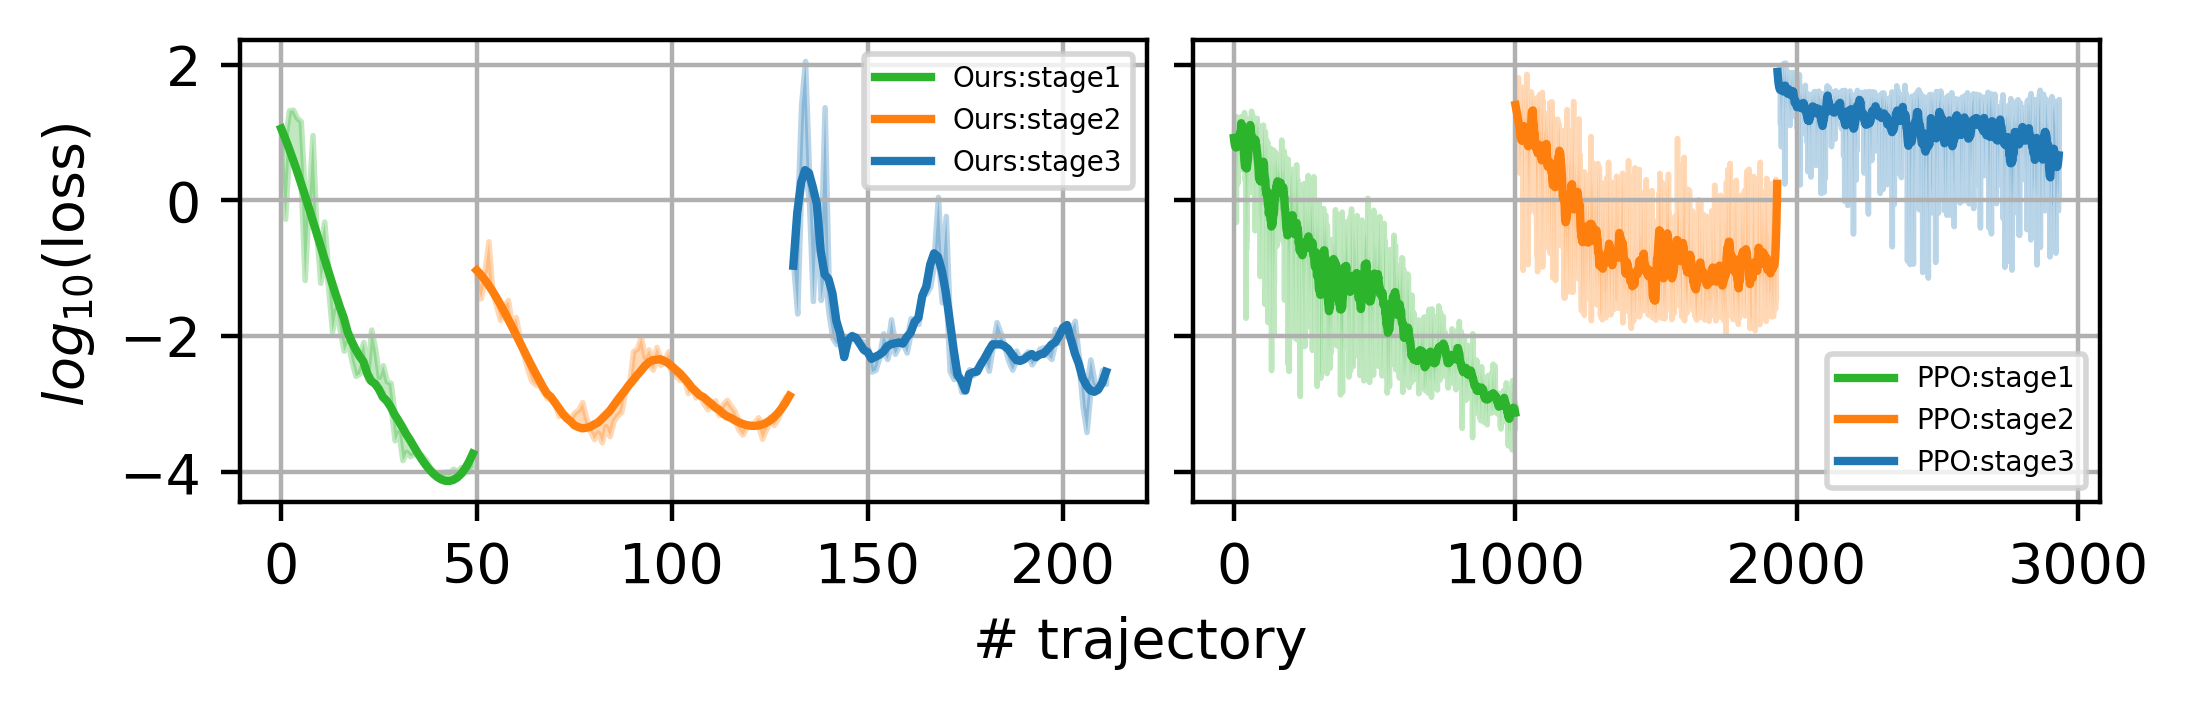

In [56]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy.signal import savgol_filter

diff1s = pd.read_csv("/Users/lizhehao/Desktop/research/SPlisHSPlasH-fix-macos/pySPlisHSPlasH/research/selectedRuns/diff-1s.csv")
diff3s = pd.read_csv("/Users/lizhehao/Desktop/research/SPlisHSPlasH-fix-macos/pySPlisHSPlasH/research/selectedRuns/diff-3s.csv")
diff5s = pd.read_csv("/Users/lizhehao/Desktop/research/SPlisHSPlasH-fix-macos/pySPlisHSPlasH/research/selectedRuns/diff-5s.csv")
diff5s = diff5s[:81]

ppo1s = pd.read_csv("/Users/lizhehao/Desktop/research/SPlisHSPlasH-fix-macos/pySPlisHSPlasH/research/selectedRuns/ppo-1s.csv")
# ppo1s = ppo1s[:400]
ppo3s = pd.read_csv("/Users/lizhehao/Desktop/research/SPlisHSPlasH-fix-macos/pySPlisHSPlasH/research/selectedRuns/ppo-3s.csv")
# ppo3s = ppo3s[:400]
ppo5s = pd.read_csv("/Users/lizhehao/Desktop/research/SPlisHSPlasH-fix-macos/pySPlisHSPlasH/research/selectedRuns/ppo-5s.csv")

window_size = 31
order = 3
# test["smoothed"] = savgol_filter(test["Value"], 7, order)
# train["smoothed"] = savgol_filter(train["Value"], window_size, order)
# train = train[:601]

# plt.yticks(np.arange(-3, 2, 0.5))
# diff_x = len(diff1s['step']) + len(diff3s['step']) + len(diff5s['step'])
get_x = lambda a: np.array(list(range(len(a['Step']))))
l = lambda a: len(a["Step"])

blue = (31 / 255, 119 / 255, 180 / 255, 1)
blue_ppo = (46 / 255, 85 / 255, 151 / 255, 1)

orange = (255 / 255, 127 / 255, 14 / 255, 1)
orange_ppo = (197 / 255, 90 / 255, 17 / 255, 1)

green = (44/255, 180/255, 44/255, 1)
green_ppo = (84/255, 150/255, 53/255, 1)

red = (214 / 255, 39 / 255, 40 / 255)

purple = (148 / 255, 103 / 255, 189/ 255)

brown = (140 / 255, 86 / 255, 75 / 255)

def draw(diff1s, offset=0, minus=True, label="Ours", use_smooth=True, window_size =31, order=3, color=green):
    a = -1 if minus else 1
    if use_smooth:
        try:
            y = np.log10((-a) * np.array(diff1s['Value']))
        except Exception:
            print(np.array(diff1s['Value']))
        y_smooth = savgol_filter(y, window_size, order)
        # plt.plot(y)
        plt.plot(offset + get_x(diff1s), y_smooth, label=f"{label}", color=color)
        plt.fill_between(offset + get_x(diff1s), np.minimum(y, y_smooth), np.maximum(y, y_smooth), color=color, alpha=0.3)
    else:
        plt.plot(get_x(diff1s) + offset, np.log10((-a) * np.array(diff1s['Value'])) , label=f"{label}", color=color)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(6,1.5), dpi=400)
ax1.set( ylabel=' $log_{10}($loss$)$ ')
# plt.setp(ax2.get_xticklabels(), visible=False)
# ax1.ylabel("$-log_{10}$$\|$reward$\|$")
# plt.xlabel("# trajectory")
plt.subplot(1,2,1)
# fig = plt.figure(constrained_layout=True, figsize=(6, 2), dpi=400)
# subfigs = fig.subfigures(1, 2, wspace=0.07)

plt.grid(True)
draw(diff1s,  use_smooth=True, color=green, label="Ours:stage1")
draw(diff3s, offset= l(diff1s), use_smooth=True, color=orange, label="Ours:stage2")
draw(diff5s, offset=l(diff1s) + l(diff3s), use_smooth=True, window_size=11, color=blue, label="Ours:stage3")
plt.legend(fontsize=5)

plt.subplot(1,2,2)
plt.grid(True)

draw(ppo1s, minus=False, label="PPO:stage1", color=green)
draw(ppo3s, offset=l(ppo1s),  minus=False,label= "PPO:stage2", color=orange)
draw(ppo5s, offset=l(ppo1s)+l(ppo3s), minus=False,label= "PPO:stage3", color=blue)

# plt.figure(figsize=(6,2), dpi=400)
# plt.grid(True)
# draw(ppo3s,  False, "PPO", colors=[blue, light_blue])
# draw(diff3s,  use_smooth=False)

# plt.figure(figsize=(6,2), dpi=400)
# plt.grid(True)
# draw(ppo5s,  False, "PPO", colors=[blue, light_blue])
# draw(diff5s,  use_smooth=False)
# plt.plot(len(diff1s['Step']) + np.arange(len(diff1s['Step']))), -(np.array(diff3s['Value']))
# plt.plot(list(range(len(diff1s['Step']))), -(np.array(diff1s['Value'])))

# sns.lineplot(data=train, x="Step", y="smoothed", label="Training")
# sns.lineplot(data=test, x="Step", y="smoothed", label="Test")

# plt.legend(fontsize = 8)

plt.legend(fontsize=5)
fig.text(0.5, -0.15, '# trajectory', ha='center')
fig.subplots_adjust(wspace=0.05)
# fig.align_xlabels() # center x labels
# plt.legend(loc='center right',bbox_to_anchor=(0.33, 0.9))